In [3]:
# Numpy
import numpy as np
from skimage.io import imread
from sklearn.cluster import KMeans

# OpenCV is a computer vision library
import cv2 as cv

# Library for plotting
# %matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt




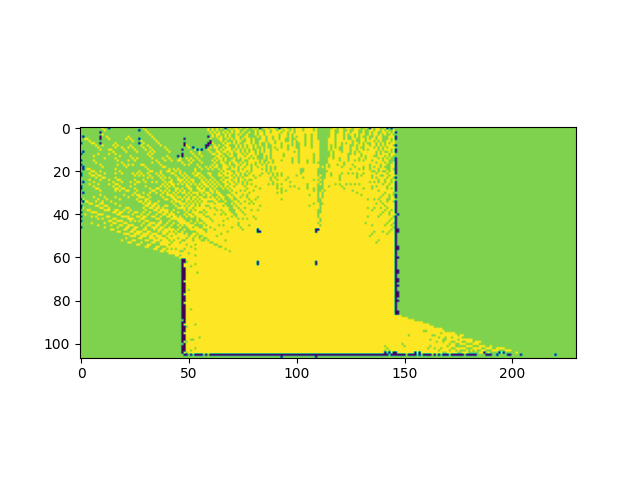

In [56]:
# Draw the raw map
image = cv.imread('tempmap3.pgm', cv.IMREAD_GRAYSCALE)
# map[map] = 255
plt.imshow(image)
# print(map.shape)
plt.show()



(array([ 1310, 10707]),)


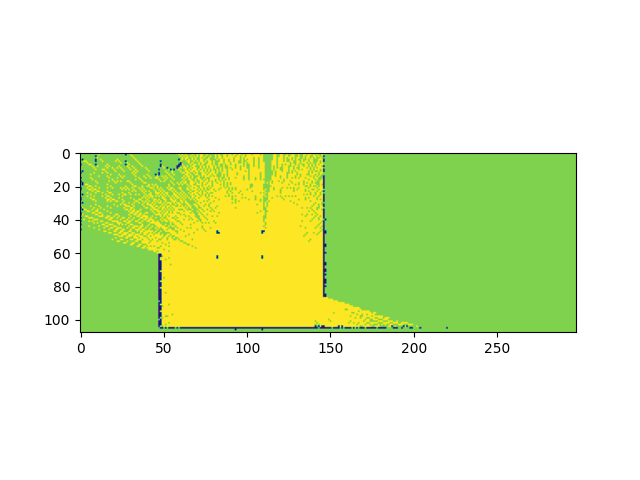

[ 5 96]
[49 50]


In [100]:
# The value of the pixels you're interested in
target_value = 205

# Coordinates of the source pixel
source_pixel = (50,95)

# Find the indices of all pixels with the target value
target_indices = np.column_stack(np.where(image == target_value))

# Calculate distances from the source pixel to all target pixels
distances = np.sqrt((target_indices[:, 0] - source_pixel[0]) ** 2 + (target_indices[:, 1] - source_pixel[1]) ** 2)

# Find the pixels that are closest to a percentile
diff = np.abs(distances - np.percentile(distances,3))
min_diff_index = np.unravel_index(np.argmin(diff), diff.shape)

idxs = np.where(distances==distances[min_diff_index])
print(idxs)
target_indices[idxs[0][0],:]

# Plot the image and the found points
plt.clf()
plt.imshow(image)
# print(map.shape)
plt.show()


for I in range(idxs[0].shape[0]):
    idx = idxs[0][I]
    pnt = target_indices[idx,:]
    print(pnt)

    plt.plot(pnt[1],pnt[0],'r*')
